# Fourier Transform Model of Image Formation

The packages imported were the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.fft as fft
from skimage import io
from scipy import signal
%matplotlib inline

These are the functions I made to perform the fourier transform of the images as well as show the comaprison between the original image and the fourier transform of the image. 

In [19]:
def fourier_transform(image):
    plt.figure(figsize=(12,8))
    plt.subplot(231)
    plt.imshow(image, cmap='gray')
    plt.title('Image')

    fourier1 = fft.fft2(image)
    plt.subplot(232)
    plt.imshow(abs(fourier1), cmap='gray')
    plt.title('Fourier transform of image')

    Image = fft.fftshift(fourier1)
    plt.subplot(233)
    plt.imshow(abs(Image), cmap='gray')
    plt.title('Shifted fourier transform of image')

    r_image= np.real(Image)
    plt.subplot(234)
    plt.imshow(r_image, cmap='gray')
    plt.title('Real part of the FT of image')

    i_image= np.imag(Image)
    plt.subplot(235)
    plt.imshow(i_image, cmap='gray')
    plt.title('Imag part of the FT of image')

    plt.subplot(236)
    plt.imshow(abs(fft.fft2(fourier1)), cmap='gray')
    plt.title('FT of the FT of the image')
    
def fourier_transform1(image):
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.imshow(image, cmap='gray')
    plt.title('Image')

    fourier1 = fft.fft2(image)
    plt.subplot(222)
    plt.imshow(abs(fourier1), cmap='gray')
    plt.title('Fourier transform of image')

    Image = fft.fftshift(fourier1)
    plt.subplot(223)
    plt.imshow(abs(Image), cmap='gray')
    plt.title('Shifted fourier transform of image')

    plt.subplot(224)
    plt.imshow(abs(fft.fft2(fourier1)), cmap='gray')
    plt.title('FT of the FT of the image')

# Activity 1. Familiarization with discrete FFT 

FOURIER TRANSFORM OF A CIRCLE

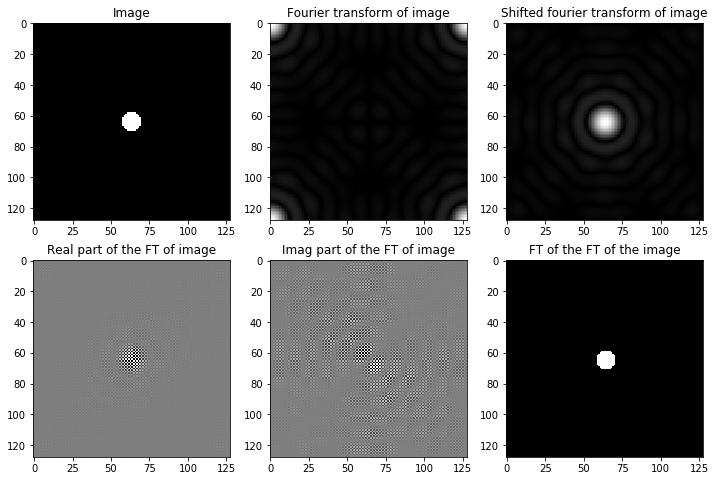

In [20]:
circ = io.imread('circle2.png', as_grey=True)
fourier_transform(circ)

This is the fourier transform of a white circle centered on a black background. Yes, it is consistent with the analytical fourier transform of a circle, which are airy circular patterns, After applying fft2 twice, the original image returned. 

FOURIER TRANSFORM OF LETTER 'A'

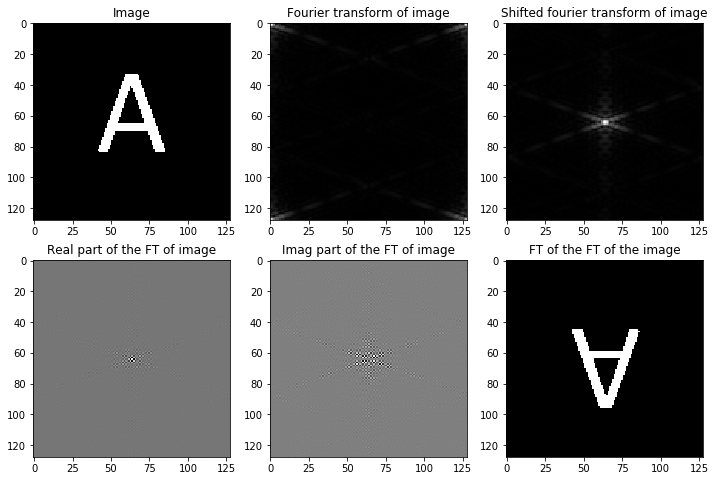

In [21]:
a = io.imread('A.png', as_grey=True)
fourier_transform(a)

The figures above show the fourier transform of the letter A. When fft2 was performed twice, the original image retuned but was inverted. 

FOURIER TRANSFORM OF SINUSOID ALONG X (CORRUGATED ROOF)

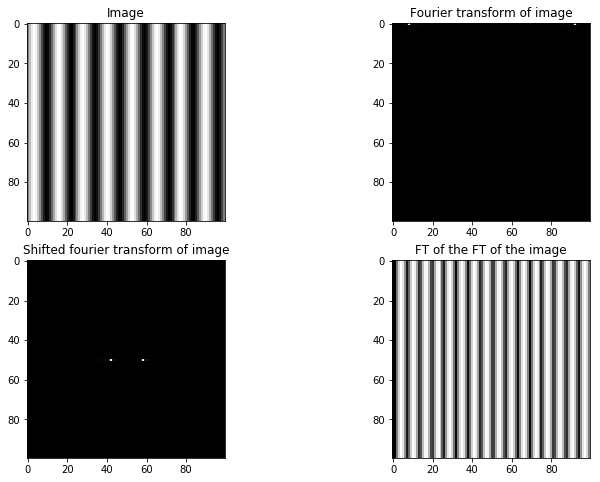

In [22]:
nx = 100
ny = 100
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
X,Y = np.meshgrid(x,y)
f = 4
sine = np.sin(2*np.pi*f*X)
fourier_transform1(sine)

The fourier transform of the sinusoid peaks at the frequency of the wave. 

FOURIER TRANSFORM OF SIMULATED DOUBLE SLIT

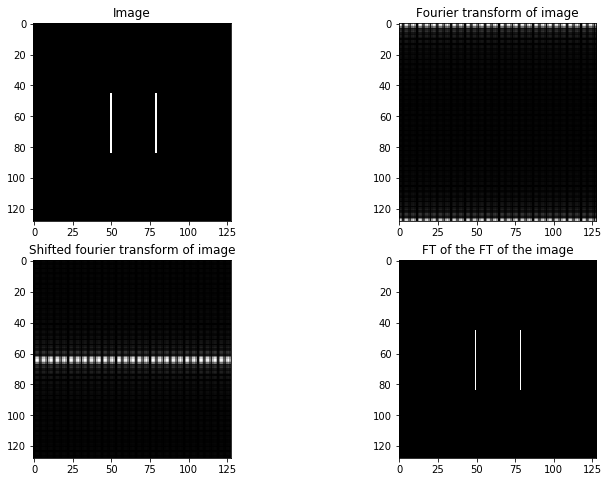

In [32]:
double_slit = np.zeros((128,128))
double_slit[45:84,50] = 1
double_slit[45:84,79] = 1
fourier_transform1(double_slit)

The interference pattern in shifted fourier transform image of a double slit is expected since we already did this experiment in another class.

FOURIER TRANSFORM OF SQUARE FUNCTION

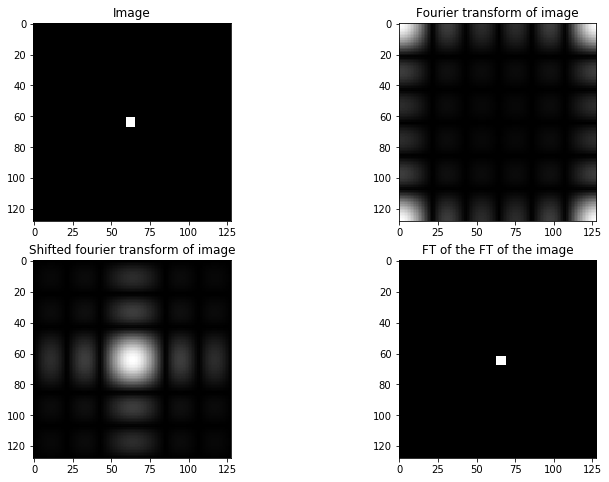

In [24]:
square = io.imread('square.png', as_grey=True)
fourier_transform1(square)

FOURIER TRANSFORM OF 2D GAUSSIAN BELL CURVE

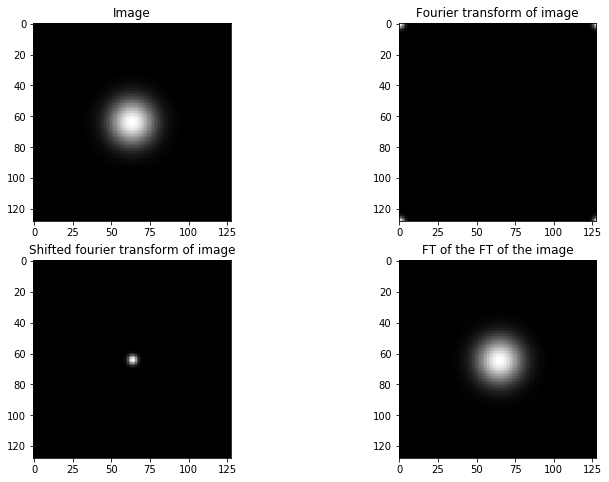

In [34]:
X1,Y1 = np.meshgrid(np.linspace(-1,1,128),np.linspace(-1,1,128))
r = X1**2 + Y1**2;
gaussian = np.exp(-r/0.05)
fourier_transform1(gaussian)

From the figures above, it can be observed that the fourier transform of a Gaussian function is also a Gaussian. 

# Activity 2. Simulation of an imaging device.

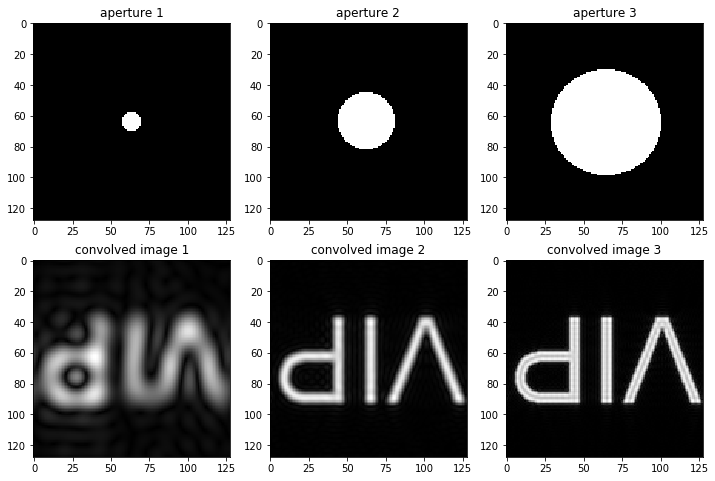

In [16]:
vip = io.imread('VIP.png', as_grey=True)
plt.figure(figsize=(12,8))
fourier5 = fft.fft2(vip)

aperture1 = io.imread('circle2.png', as_grey=True)
Aperture1 = fft.fftshift(aperture1)
plt.subplot(231)
plt.imshow(aperture1, cmap='gray')
plt.title('aperture 1')

vip_aperture1 = fourier5*Aperture1
convolved_vip1 = fft.fft2(vip_aperture1)
plt.subplot(234)
plt.imshow(abs(convolved_vip1), cmap='gray')
plt.title('convolved image 1')

aperture = io.imread('circle.png', as_grey=True)
Aperture = fft.fftshift(aperture)
plt.subplot(232)
plt.imshow(aperture, cmap='gray')
plt.title('aperture 2')

vip_aperture = fourier5*Aperture
convolved_vip = fft.fft2(vip_aperture)
plt.subplot(235)
plt.imshow(abs(convolved_vip), cmap='gray')
plt.title('convolved image 2')

aperture2 = io.imread('circle3.png', as_grey=True)
Aperture2 = fft.fftshift(aperture2)
plt.subplot(233)
plt.imshow(aperture2, cmap='gray')
plt.title('aperture 3')

vip_aperture2 = fourier5*Aperture2
convolved_vip2 = fft.fft2(vip_aperture2)
plt.subplot(236)
plt.imshow(abs(convolved_vip2), cmap='gray')
plt.title('convolved image 3')

From the figures above, it can be seen that a clearer image is observed as the radius of the aperture is increased. This is our expected trend since a larger aperture allows more light to pass through, which in turn produces a clearer image.

# Activity 3. Template Matching using correlation

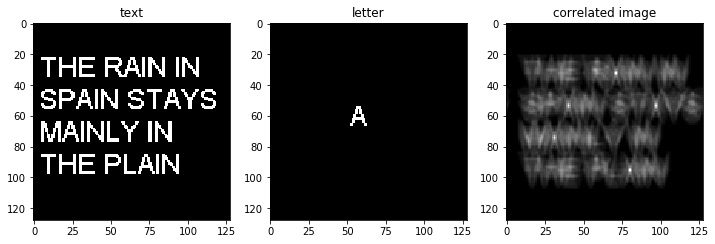

In [17]:
text = io.imread('sentence.png', as_grey=True)
a_small = io.imread('Asmall.png', as_grey=True)

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(text, cmap='gray')
plt.title('text')
plt.subplot(132)
plt.imshow(a_small, cmap='gray')
plt.title('letter')

fourier6 = np.conjugate(fft.fft2(text))
fourier7 = fft.fft2(a_small)

correlation = fourier7*fourier6
plt.subplot(133)
plt.imshow(abs(fft.fftshift(fft.fft2(correlation))), cmap='gray')
plt.title('correlated image')

The correlation process locates the positions of the letter 'A' in the original text and then highlights its position in the final output. 

# Activity 4. Edge detection using the convolution integral

Using different patterns and applying the convolution integral to the text, we observed that the process isolates the edges of the text that are similar to the corresponding pattern it was being convolved with. 

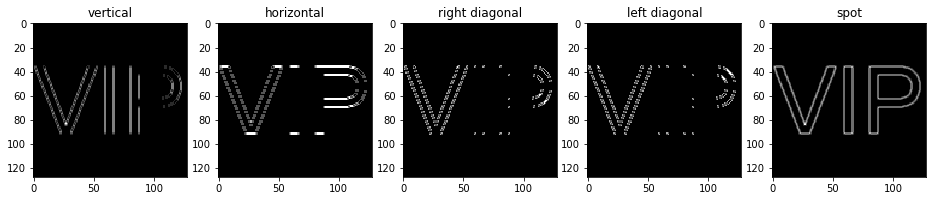

In [18]:
n = 128
vertical = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
horizontal = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
rdiag = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
ldiag = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
spot = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

V = np.zeros((n,n))
V[63:66,63:66] = vertical
H = np.zeros((n,n))
H[63:66,63:66] = horizontal
R = np.zeros((n,n))
R[63:66,63:66] = rdiag
L = np.zeros((n,n))
L[63:66,63:66] = ldiag
S = np.zeros((n,n))
S[63:66,63:66] = spot


fourier8 = np.conjugate(fft.fft2(vip))
fourier9 = fft.fft2(V)
fourier10 = fft.fft2(H)
fourier11 = fft.fft2(R)
fourier12 = fft.fft2(L)
fourier13 = fft.fft2(S)

plt.figure(figsize=(16,12))
plt.subplot(151)
convolution1 = fourier9*fourier8
plt.imshow(abs(fft.fftshift(fft.fft2(convolution1))), cmap='gray')
plt.title('vertical')

plt.subplot(152)
convolution2 = fourier10*fourier8
plt.imshow(abs(fft.fftshift(fft.fft2(convolution2))), cmap='gray')
plt.title('horizontal')

plt.subplot(153)
convolution3 = fourier11*fourier8
plt.imshow(abs(fft.fftshift(fft.fft2(convolution3))), cmap='gray')
plt.title('right diagonal')

plt.subplot(154)
convolution4 = fourier12*fourier8
plt.imshow(abs(fft.fftshift(fft.fft2(convolution4))), cmap='gray')
plt.title('left diagonal')

plt.subplot(155)
convolution5 = fourier13*fourier8
plt.imshow(abs(fft.fftshift(fft.fft2(convolution5))), cmap='gray')
plt.title('spot')